In [1]:
import os, math
import numpy as np
from matplotlib import pyplot as plt
import tensorflow as tf
print("Tensorflow version " + tf.__version__)
tf.enable_eager_execution()

/usr/local/envs/py2env/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Tensorflow version 1.8.0


In [2]:
GCS_DIR = 'gs://buoyant-yew-223720/TestFiles/test_fold_structure'

In [3]:
tf.gfile.ListDirectory(GCS_DIR)

['fold1/', 'fold2/']

In [4]:
for fold in tf.gfile.ListDirectory(GCS_DIR):
  print(fold, tf.gfile.ListDirectory(GCS_DIR+'/'+fold))

('fold1/', ['not_toxic/', 'toxic/'])
('fold2/', ['not_toxic/', 'toxic/'])


In [5]:
GCS_PATTERN = 'gs://buoyant-yew-223720/TestFiles/test_fold_structure/fold1/*/*.jpeg'

In [6]:
CLASSES = ['toxic','not_toxic']

In [7]:
tf.gfile.Glob(GCS_PATTERN)

['gs://buoyant-yew-223720/TestFiles/test_fold_structure/fold1/not_toxic/mol_title_Row4_Row2_nrow_21871_ID_TOX5879_angles_0_45.jpeg',
 'gs://buoyant-yew-223720/TestFiles/test_fold_structure/fold1/not_toxic/mol_title_Row4_Row2_nrow_21871_ID_TOX5879_angles_1_45.jpeg',
 'gs://buoyant-yew-223720/TestFiles/test_fold_structure/fold1/not_toxic/mol_title_Row4_Row2_nrow_21871_ID_TOX5879_angles_2_45.jpeg',
 'gs://buoyant-yew-223720/TestFiles/test_fold_structure/fold1/not_toxic/mol_title_Row4_Row2_nrow_21871_ID_TOX5879_angles_3_45.jpeg',
 'gs://buoyant-yew-223720/TestFiles/test_fold_structure/fold1/not_toxic/mol_title_Row4_Row2_nrow_21871_ID_TOX5879_angles_4_45.jpeg',
 'gs://buoyant-yew-223720/TestFiles/test_fold_structure/fold1/not_toxic/mol_title_Row4_Row2_nrow_21871_ID_TOX5879_angles_5_45.jpeg',
 'gs://buoyant-yew-223720/TestFiles/test_fold_structure/fold1/not_toxic/mol_title_Row4_Row2_nrow_21871_ID_TOX5879_angles_6_45.jpeg',
 'gs://buoyant-yew-223720/TestFiles/test_fold_structure/fold1/not_tox

In [8]:
def display_9_images_from_dataset(dataset):
  plt.figure(figsize=(13,13))
  subplot=331
  for i, (image, label, one_hot_label) in enumerate(dataset):
    plt.subplot(subplot)
    plt.axis('off')
    plt.imshow(image.numpy().astype(np.uint8))
    plt.title(label.numpy().decode("utf-8") + ' ' + str(one_hot_label.numpy()), fontsize=16)
    subplot += 1
    if i==8:
      break
  plt.tight_layout()
  plt.subplots_adjust(wspace=0.1, hspace=0.1)
  plt.show()

In [9]:
nb_images = len(tf.gfile.Glob(GCS_PATTERN))
print("Pattern matches {} images.".format(nb_images))

### QUESTIONS 1. and 2.
filenames_dataset = tf.data.Dataset.list_files(GCS_PATTERN)
for filename in filenames_dataset.take(10):
  print(filename.numpy().decode('utf-8'))
  
### QUESTION 3.

# copy-pasted from "useful code snippets" below
def decode_jpeg(filename):
  bits = tf.read_file(filename)
  image = tf.image.decode_jpeg(bits)
  return image

image_dataset = filenames_dataset.map(decode_jpeg)
for image in image_dataset.take(10):
  print(image.numpy().shape)
  

Pattern matches 20 images.
gs://buoyant-yew-223720/TestFiles/test_fold_structure/fold1/not_toxic/mol_title_Row4_Row2_nrow_21871_ID_TOX5879_angles_3_45.jpeg
gs://buoyant-yew-223720/TestFiles/test_fold_structure/fold1/toxic/mol_title_Row33_dup_Row15_nrow_32898_ID_TOX156_angles_1_45.jpeg
gs://buoyant-yew-223720/TestFiles/test_fold_structure/fold1/not_toxic/mol_title_Row4_Row2_nrow_21871_ID_TOX5879_angles_2_45.jpeg
gs://buoyant-yew-223720/TestFiles/test_fold_structure/fold1/not_toxic/mol_title_Row4_Row2_nrow_21871_ID_TOX5879_angles_5_45.jpeg
gs://buoyant-yew-223720/TestFiles/test_fold_structure/fold1/toxic/mol_title_Row33_dup_Row15_nrow_32898_ID_TOX156_angles_0_45.jpeg
gs://buoyant-yew-223720/TestFiles/test_fold_structure/fold1/toxic/mol_title_Row32_dup_Row15_nrow_32897_ID_TOX156_angles_1_45.jpeg
gs://buoyant-yew-223720/TestFiles/test_fold_structure/fold1/not_toxic/mol_title_Row4_Row2_nrow_21871_ID_TOX5879_angles_4_45.jpeg
gs://buoyant-yew-223720/TestFiles/test_fold_structure/fold1/toxic/m

In [23]:
def decode_jpeg_and_label(filename):
  bits = tf.read_file(filename)
  image = tf.image.decode_jpeg(bits)
  label = tf.string_split(tf.expand_dims(filename, axis=-1), delimiter='/')
  label = label.values[-2]
  one_hot_label = tf.tile(tf.expand_dims(label, axis=-1), [len(CLASSES)])
  one_hot_label = tf.cast(tf.equal(one_hot_label, CLASSES), tf.uint8)
  return image, label, one_hot_label

dataset = filenames_dataset.map(decode_jpeg_and_label)
for image, label, one_hot_label in dataset.take(10):
  print(image.numpy().shape, label.numpy().decode('utf-8'), one_hot_label.numpy())

((525, 576, 3), u'not_toxic', array([0, 1], dtype=uint8))
((525, 576, 3), u'not_toxic', array([0, 1], dtype=uint8))
((525, 576, 3), u'not_toxic', array([0, 1], dtype=uint8))
((525, 576, 3), u'toxic', array([1, 0], dtype=uint8))
((525, 576, 3), u'not_toxic', array([0, 1], dtype=uint8))
((525, 576, 3), u'toxic', array([1, 0], dtype=uint8))
((525, 576, 3), u'not_toxic', array([0, 1], dtype=uint8))
((525, 576, 3), u'toxic', array([1, 0], dtype=uint8))
((525, 576, 3), u'not_toxic', array([0, 1], dtype=uint8))
((525, 576, 3), u'not_toxic', array([0, 1], dtype=uint8))


/usr/local/envs/py2env/lib/python2.7/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


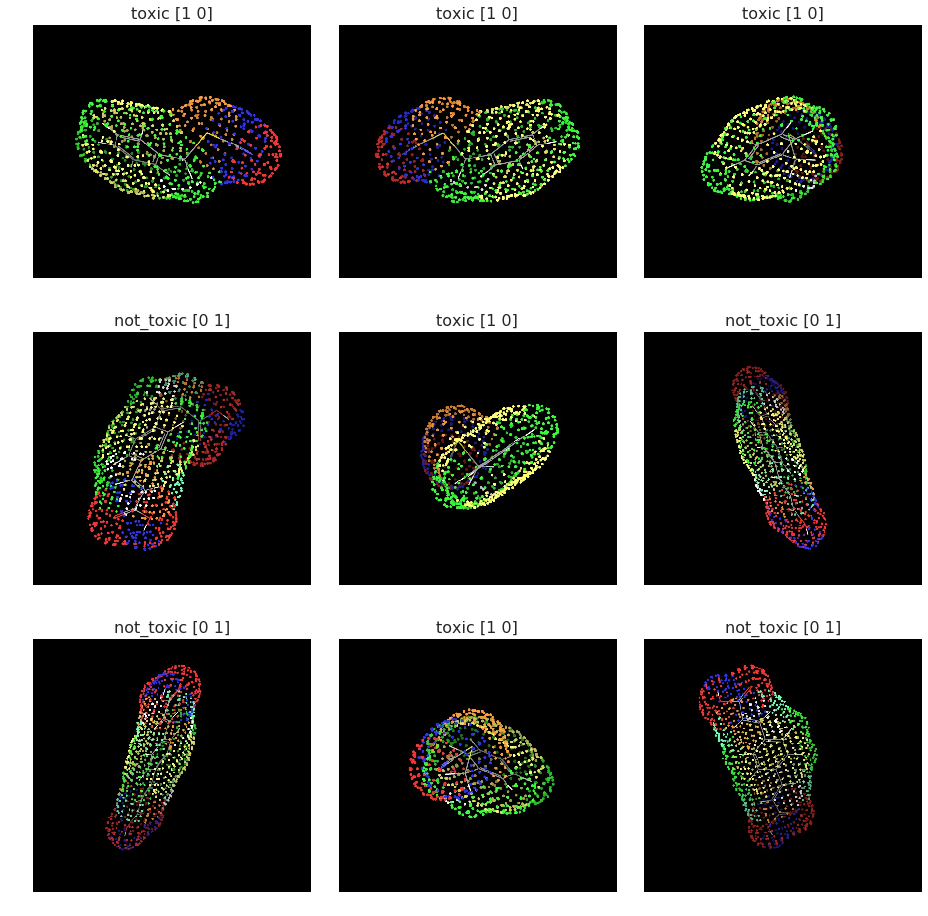

In [24]:
display_9_images_from_dataset(dataset)